# Working with vector and matrices

In this notebook, we show some of the most useful features of the [tensor](../tensor.rst) module. The module contains abstractions to work with coherent collections of objects, like vectors. We will focus on vectors of [timeseries](../series.rst), but the same applies to [grid data](../grid_data.rst).

As an example, we will work with same fake horizon centroid data.

(This notebook is meant to be converted in Sphinx documentation and not used directly.)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from kuibit.timeseries import TimeSeries
from kuibit.tensor import Vector

%matplotlib inline

In [2]:
# First, we generate the data. We will focus on the XY plane.

# This is an outspiral
t = np.linspace(0, 20, 5000)
x1 = t * np.sin(t)
y1 = t * np.cos(t)
x2 = -t * np.sin(t)
y2 = -t * np.cos(t)

bh1 = Vector([TimeSeries(t, x1), TimeSeries(t, y1)])
bh2 = Vector([TimeSeries(t, x2), TimeSeries(t, y2)])

`bh1` and `bh2` are `Vector`s of `TimeSeries`. Let's plot them.

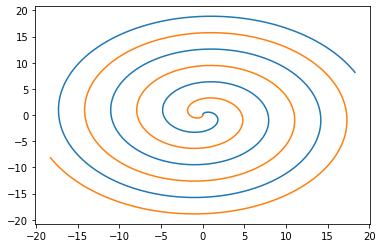

In [3]:
plt.plot(*bh1)  # Example of unpacking the vector into the two components
plt.plot(bh2[0], bh2[1])

`Vectors` behave like mathematical vectors: we can evaluate them, or perform algebraic operations.

Distance vector at t = 2 [3.63718971 1.66458735]


Text(0, 0.5, 'Distance')

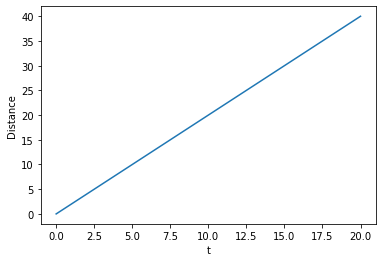

In [4]:
distance_vector = abs(bh1 - bh2)
print(f"Distance vector at t = 2 {distance_vector(2)}")

# We can also get the magnitude of the distance as a function of time
plt.plot(distance_vector.norm())
# distance_vector.norm() is a TimeSeries
plt.xlabel("t")
plt.ylabel("Distance")

`Vectors` inherit all the methods from the contained object. In this case, `TimeSeries`, so we can call methods like `differentiated` to take the time derivative.

Text(0, 0.5, 'v^x')

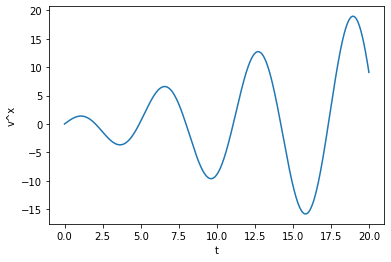

In [5]:
velocity1 = bh1.differentiated()

# velocity1 is a Vector with the time derivatives
# plotting the first component, along the x axis
plt.plot(velocity1[0])
plt.xlabel("t")
plt.ylabel("v^x")

Methods that edit the object in place work too, so we could have taken the derivative with `differentiate`.

Text(0, 0.5, 'v^x')

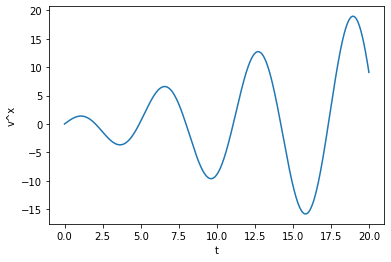

In [6]:
bh1.differentiate()

plt.plot(bh1[0])
plt.xlabel("t")
plt.ylabel("v^x")

IN this notebook, we looked at `Vector`. `Matrix` objects behave similarly. Both `Vector` and `Matrix` share infrastructure with the general `Tensor` class, which, at the moment, implements basic features to work with tensors of generic rank.